<a href="https://colab.research.google.com/github/venukashoju/ML/blob/main/Amazon_Product_Reviews_Sentiment_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20240828180525/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

,0
Review,0
Sentiment,0


In [6]:
df.loc[df['Sentiment']<=3,'Sentiment'] = 0
df.loc[df['Sentiment']>3,'Sentiment'] = 1
df

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24995,These cables (lightning) are far superior to m...,1
24996,This unit performs exactly as advertised. I u...,1
24997,I had the key cut at a local hardware store cu...,1
24998,I love my case I ordered from amazon. It wasn'...,1


In [7]:
stp_words = stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

df['Review']=df['Review'].apply(clean_review)
df

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0
...,...,...
24995,These cables (lightning) far superior cables m...,1
24996,This unit performs exactly advertised. I use c...,1
24997,"I key cut local hardware store cut free, progr...",1
24998,I love case I ordered amazon. It color looked ...,1


In [8]:
df.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [9]:
df['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


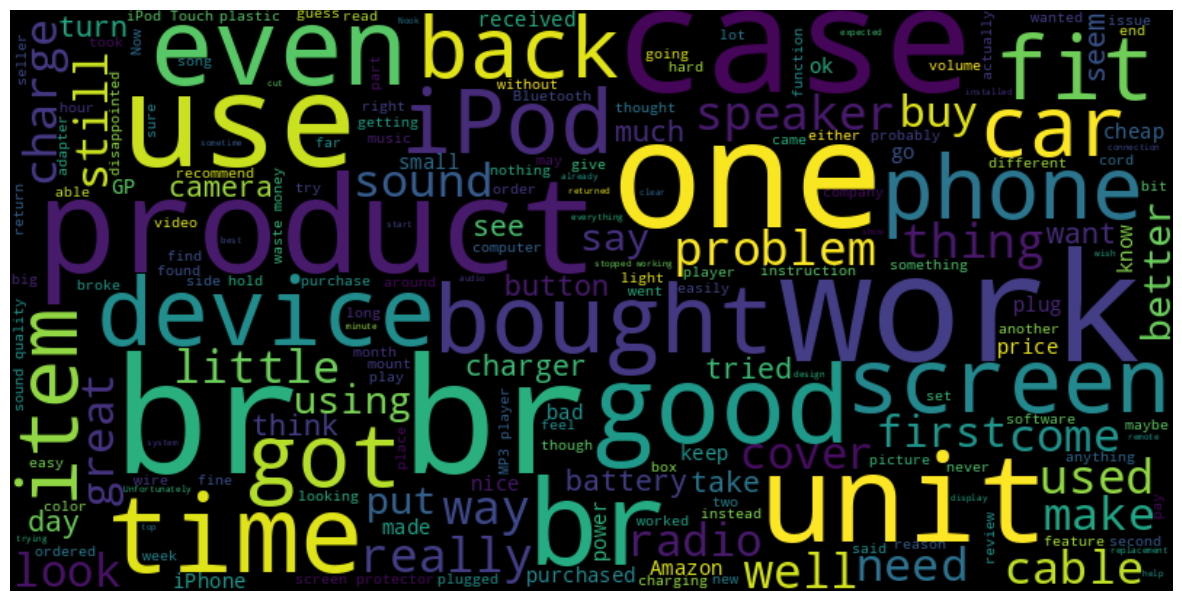

In [10]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=800,height=400,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

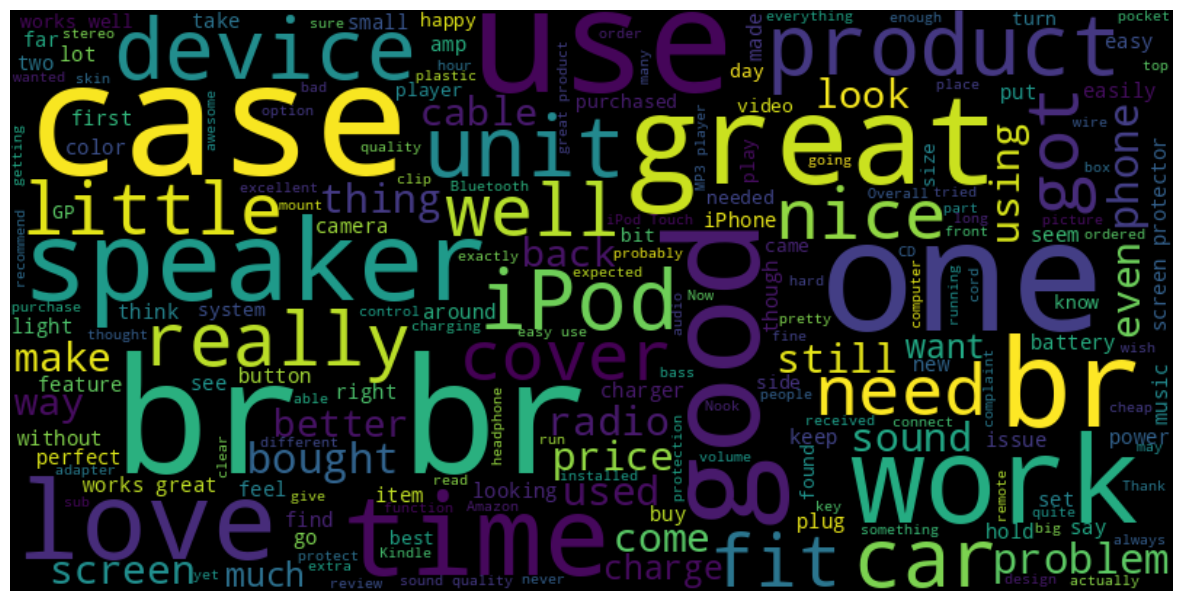

In [11]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=800,height=400,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review']).toarray()

In [15]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,df['Sentiment'],test_size=0.25 ,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))

0.816


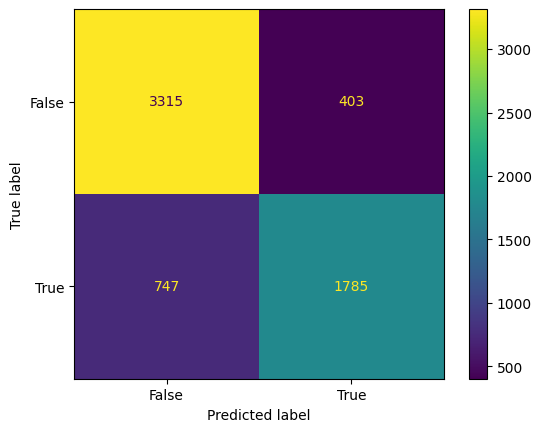

In [19]:
from tkinter.constants import Y
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = [False,True])
cm_display.plot()
plt.show()